# Pengolahan Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## 1. Data sebelum dinormalisasi

In [2]:
# Baca dataset
df = pd.read_csv("dataset.csv")
df

,Recency,Frequency,Monetary
0,650,2,230467
1,789,1,115035
2,726,1,109598
3,663,1,112147
4,770,1,111744
...,...,...,...
2233,673,1,112147
2234,748,1,186093
2235,690,1,112147
2236,680,1,224294


## 2. Hasil Data yang dinormalisasi

In [3]:
# Buat objek MinMaxScaler untuk menormalisasikan nilai pada dataset
mms = MinMaxScaler()

# Aplikasikan variabel `df` untuk dihasilkan (Transform) ke variabel `df_scaled` 
df_scaled = mms.fit_transform(df)

# Ubah bentuk array df_scaled menjadi Dataframe
df_scaled = pd.DataFrame(df_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Simpan dataframe ke dalam file csv
df_scaled.to_csv("dataset_scaled.csv", index=False)

# Simpan ke variabel
df_rfm = df_scaled

# Tampilkan
df_rfm

,Recency,Frequency,Monetary
0,0.012346,0.045455,0.088999
1,0.870370,0.000000,0.044423
2,0.481481,0.000000,0.042323
3,0.092593,0.000000,0.043308
4,0.753086,0.000000,0.043152
...,...,...,...
2233,0.154321,0.000000,0.043308
2234,0.617284,0.000000,0.071863
2235,0.259259,0.000000,0.043308
2236,0.197531,0.000000,0.086615


## 3. Data setelah dinormalisasi 
Dimasukkan pada variabel `tabel_rfm`

In [4]:
tabel_rfm = df_scaled.values
tabel_rfm

array([[0.01234568, 0.04545455, 0.08899893],
       [0.87037037, 0.        , 0.04442281],
       [0.48148148, 0.        , 0.04232322],
       ...,
       [0.25925926, 0.        , 0.04330756],
       [0.19753086, 0.        , 0.08661512],
       [0.19135802, 0.        , 0.00426522]])

# Perhitungan Tiap Jarak terhadap 2 Cluster

## 1. Inisialisasi Medoids dan Variabel Jumlah Cluster

In [5]:
medoids_cluster = [
  # [Recency, Frequency, Monetary]
  [0.938, 0.000, 0.046], # Cluster ke-1/indeks 0
  [0.093, 0.000, 0.043], # Cluster ke-2/indeks 1
]
jumlah_cluster = len(medoids_cluster)

## 2. Perhitungan Jarak

### a. Jarak Euclidean terhadap 2 Cluster
Euclidean Distance: `np.linalg.norm(a - b)`

#### 1. Membuat `list_cluster_euclidean` yang berisi 2 List (sesuai jumlah medoid/cluster) 

In [6]:
list_cluster_euclidean = [] 
for _ in range(jumlah_cluster):
    list_cluster_euclidean.append([])
print(list_cluster_euclidean)

[[], []]


#### 2. Proses Clustering Menggunakan Euclidean Distance
Euclidean Distance: `np.linalg.norm(a - b)`

In [7]:
for index_titik, titik_data in enumerate(tabel_rfm):

    list_jarak = []

    for medoid in  medoids_cluster:
        jarak_titik_ke_medoid = np.linalg.norm(titik_data - medoid)
        list_jarak.append(jarak_titik_ke_medoid)

    jarak_terdekat = min(list_jarak)
    
    label_cluster = list_jarak.index(jarak_terdekat)
    list_cluster_euclidean[label_cluster].append(index_titik)

#### 3. Hasil Clustering dimasukkan ke dalam `list_cluster_euclidean` 
`list_cluster_euclidean` berisi indeks dari titik data yang termasuk ke dalam suatu cluster

In [8]:
# isi dari list_cluster: 
# [ [1, 4, 5, ..., 2234], 
#   [0, 2, 3, ..., 2237] ]
print(list_cluster_euclidean[0]) # Cluster ke-1
print(list_cluster_euclidean[1]) # Cluster ke-2

[1, 4, 5, 6, 8, 9, 11, 12, 14, 17, 18, 22, 23, 24, 26, 27, 31, 32, 35, 36, 40, 42, 45, 47, 48, 53, 55, 56, 57, 59, 60, 61, 62, 66, 68, 70, 76, 81, 82, 83, 85, 86, 87, 88, 91, 92, 96, 97, 101, 102, 103, 104, 109, 110, 112, 113, 118, 121, 124, 126, 128, 133, 135, 137, 138, 143, 144, 145, 148, 149, 155, 156, 161, 165, 175, 176, 183, 186, 189, 191, 193, 194, 197, 198, 201, 205, 206, 212, 213, 216, 217, 221, 225, 226, 229, 230, 233, 241, 248, 250, 251, 252, 255, 257, 259, 262, 263, 264, 266, 268, 270, 272, 273, 276, 277, 279, 283, 286, 298, 302, 303, 304, 305, 306, 307, 308, 309, 310, 312, 313, 318, 322, 323, 324, 325, 329, 336, 337, 338, 341, 344, 345, 346, 347, 359, 362, 365, 367, 368, 369, 372, 374, 375, 378, 381, 386, 387, 388, 390, 394, 398, 399, 403, 408, 410, 413, 414, 415, 416, 418, 419, 420, 421, 423, 428, 432, 433, 435, 438, 440, 442, 445, 446, 452, 453, 459, 462, 466, 467, 468, 470, 474, 475, 482, 486, 487, 488, 490, 491, 494, 495, 496, 502, 503, 504, 507, 508, 510, 512, 513, 515

#### 4. Membuat List Label untuk Tabel RFM

In [9]:
# Inisialisasi list label dengan nilai -1 sebanyak jumlah titik data
labels_euclidean = [-1] * len(tabel_rfm) # [-1, -1, -1, ..., -1]

# Tiap titik data akan diberikan label sesuai dengan indeks cluster
for indeks, cluster in enumerate(list_cluster_euclidean):
    for titik_index in cluster:
        labels_euclidean[titik_index] = indeks

print(labels_euclidean)

[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 

### b. Jarak Manhattan terhadap 2 Cluster
Manhattan Distance: `np.sum(np.abs(a - b))`

#### 1. Membuat `list_cluster_manhattan` yang berisi 3 List (sesuai jumlah medoid/cluster) 

In [10]:
list_cluster_manhattan = [] 
for _ in range(jumlah_cluster):
    list_cluster_manhattan.append([])
print(list_cluster_manhattan)

[[], []]


#### 2. Proses Clustering Menggunakan Manhattan Distance
Manhattan Distance: `np.sum(np.abs((a - b))`

In [11]:
for index_titik, titik_data in enumerate(tabel_rfm):
    list_jarak = []

    for medoid in  medoids_cluster:
        jarak_titik_ke_medoid = np.sum(np.abs(titik_data - medoid))
        list_jarak.append(jarak_titik_ke_medoid)

    jarak_terdekat = min(list_jarak)
    
    label_cluster = list_jarak.index(jarak_terdekat)
    list_cluster_manhattan[label_cluster].append(index_titik)

#### 3. Hasil Clustering dimasukkan ke dalam `list_cluster_manhattan` 
`list_cluster_manhattan` berisi indeks dari titik data yang termasuk ke dalam suatu cluster

In [12]:
# isi dari list_cluster: 
# [ [1, 4, 5, ..., 2234], 
#   [0, 2, 3, ..., 2237] ]
print(list_cluster_manhattan[0]) # Cluster ke-1
print(list_cluster_manhattan[1]) # Cluster ke-2

[1, 4, 5, 6, 8, 9, 11, 12, 14, 17, 18, 22, 23, 24, 26, 27, 31, 32, 35, 36, 40, 42, 45, 47, 48, 53, 55, 56, 57, 59, 60, 61, 62, 66, 68, 70, 76, 81, 82, 83, 85, 86, 87, 88, 91, 92, 96, 97, 101, 102, 103, 104, 109, 110, 112, 113, 118, 121, 124, 126, 128, 133, 135, 137, 138, 143, 144, 145, 148, 149, 155, 156, 161, 165, 175, 176, 183, 186, 189, 191, 193, 194, 197, 198, 201, 205, 206, 212, 213, 216, 217, 221, 225, 226, 229, 230, 233, 241, 248, 250, 251, 252, 255, 257, 259, 262, 263, 264, 266, 268, 270, 272, 273, 276, 277, 279, 283, 286, 298, 302, 303, 304, 305, 306, 307, 308, 309, 310, 312, 313, 318, 322, 323, 324, 325, 329, 336, 337, 338, 341, 344, 345, 346, 347, 359, 362, 365, 367, 368, 369, 372, 374, 375, 378, 381, 386, 387, 388, 390, 394, 398, 399, 403, 408, 410, 413, 414, 415, 416, 418, 419, 420, 421, 423, 428, 432, 433, 435, 438, 440, 442, 445, 446, 452, 453, 459, 462, 466, 467, 468, 470, 474, 475, 482, 486, 487, 488, 490, 491, 494, 495, 496, 502, 503, 504, 507, 508, 510, 512, 513, 515

#### 4. Membuat List Label untuk Tabel RFM

In [13]:
# Inisialisasi list label dengan nilai -1 sebanyak jumlah titik data
labels_manhattan = [-1] * len(tabel_rfm) # [-1, -1, -1, ..., -1]

# Tiap titik data akan diberikan label sesuai dengan indeks cluster
for indeks, cluster in enumerate(list_cluster_manhattan):
    for titik_index in cluster:
        labels_manhattan[titik_index] = indeks

print(labels_manhattan)

[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 

### c. Jarak Chebyshev terhadap 2 Cluster
Chebyshev Distance: `np.max(np.abs(a - b))`

#### 1. Membuat `list_cluster_chebyshev` yang berisi 3 List (sesuai jumlah medoid/cluster) 

In [14]:
list_cluster_chebyshev = [] 
for _ in range(jumlah_cluster):
    list_cluster_chebyshev.append([])
print(list_cluster_chebyshev)

[[], []]


#### 2. Proses Clustering Menggunakan Manhattan Distance
Manhattan Distance: `np.sum(np.abs((a - b))`

In [15]:
for index_titik, titik_data in enumerate(tabel_rfm):
    list_jarak = []

    for medoid in  medoids_cluster:
        jarak_titik_ke_medoid = np.sum(np.abs(titik_data - medoid))
        list_jarak.append(jarak_titik_ke_medoid)

    jarak_terdekat = min(list_jarak)
    
    label_cluster = list_jarak.index(jarak_terdekat)
    list_cluster_chebyshev[label_cluster].append(index_titik)

#### 3. Hasil Clustering dimasukkan ke dalam `list_cluster_chebyshev` 
`list_cluster_chebyshev` berisi indeks dari titik data yang termasuk ke dalam suatu cluster

In [16]:
# isi dari list_cluster: 
# [ [1, 4, 5, ..., 2234], 
#   [0, 2, 3, ..., 2237] ]
print(list_cluster_chebyshev[0]) # Cluster ke-1
print(list_cluster_chebyshev[1]) # Cluster ke-2

[1, 4, 5, 6, 8, 9, 11, 12, 14, 17, 18, 22, 23, 24, 26, 27, 31, 32, 35, 36, 40, 42, 45, 47, 48, 53, 55, 56, 57, 59, 60, 61, 62, 66, 68, 70, 76, 81, 82, 83, 85, 86, 87, 88, 91, 92, 96, 97, 101, 102, 103, 104, 109, 110, 112, 113, 118, 121, 124, 126, 128, 133, 135, 137, 138, 143, 144, 145, 148, 149, 155, 156, 161, 165, 175, 176, 183, 186, 189, 191, 193, 194, 197, 198, 201, 205, 206, 212, 213, 216, 217, 221, 225, 226, 229, 230, 233, 241, 248, 250, 251, 252, 255, 257, 259, 262, 263, 264, 266, 268, 270, 272, 273, 276, 277, 279, 283, 286, 298, 302, 303, 304, 305, 306, 307, 308, 309, 310, 312, 313, 318, 322, 323, 324, 325, 329, 336, 337, 338, 341, 344, 345, 346, 347, 359, 362, 365, 367, 368, 369, 372, 374, 375, 378, 381, 386, 387, 388, 390, 394, 398, 399, 403, 408, 410, 413, 414, 415, 416, 418, 419, 420, 421, 423, 428, 432, 433, 435, 438, 440, 442, 445, 446, 452, 453, 459, 462, 466, 467, 468, 470, 474, 475, 482, 486, 487, 488, 490, 491, 494, 495, 496, 502, 503, 504, 507, 508, 510, 512, 513, 515

#### 4. Membuat List Label untuk Tabel RFM

In [17]:
# Inisialisasi list label dengan nilai -1 sebanyak jumlah titik data
labels_chebyshev = [-1] * len(tabel_rfm) # [-1, -1, -1, ..., -1]

# Tiap titik data akan diberikan label sesuai dengan indeks cluster
for indeks, cluster in enumerate(list_cluster_chebyshev):
    for titik_index in cluster:
        labels_chebyshev[titik_index] = indeks

print(labels_chebyshev)

[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 

## 3. Visualisasi Grafik 2 Cluster

In [18]:
options = {
    "rf":{
        "sumbu_x": "Recency",
        "sumbu_y": "Frequency",
        "index_x": 0,
        "index_y": 1
    },
    "rm":{
        "sumbu_x": "Recency",
        "sumbu_y": "Monetary",
        "index_x": 0,
        "index_y": 2
    },
    "fm":{
        "sumbu_x": "Monetary",
        "sumbu_y": "Frequency",
        "index_x": 2,
        "index_y": 1
    }
}

# Warna merah, biru, oranye, hijau, dan ungu
medoid_colors1 = ['red', 'blue', 'orange', 'green', 'purple'] 

# Gunakan colormap Set2 untuk warna cluster
colors_euclidean = plt.get_cmap('Set2')(labels_euclidean)  
colors_manhattan = plt.get_cmap('Set2')(labels_manhattan)  
colors_chebyshev = plt.get_cmap('Set2')(labels_chebyshev) 

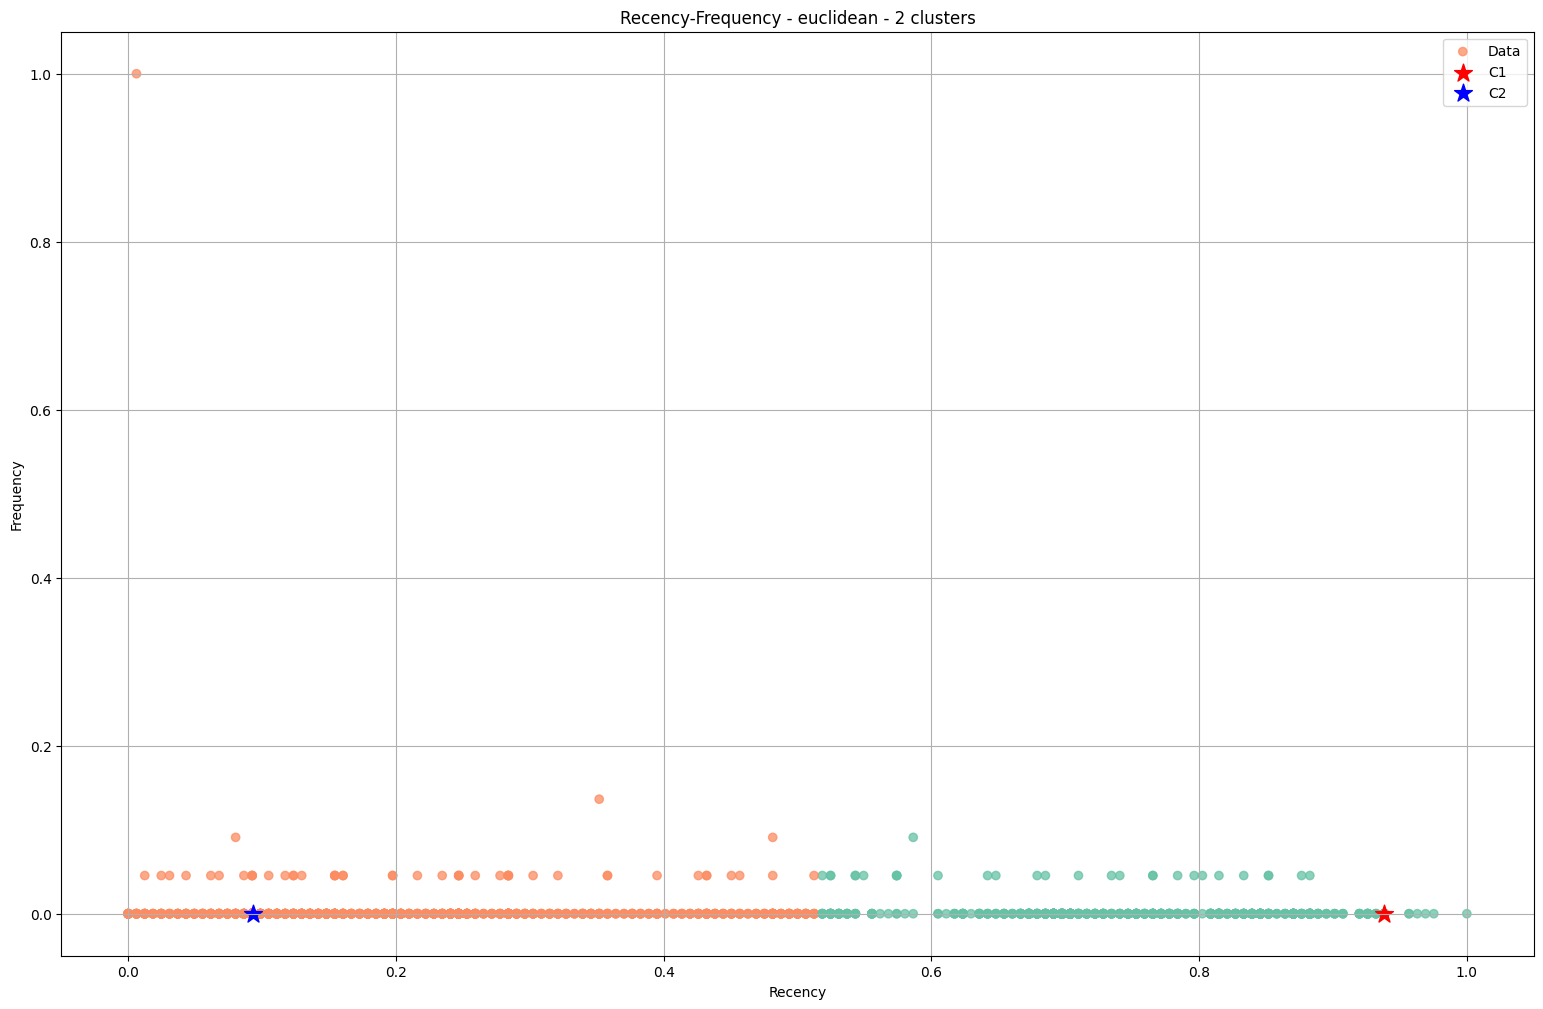

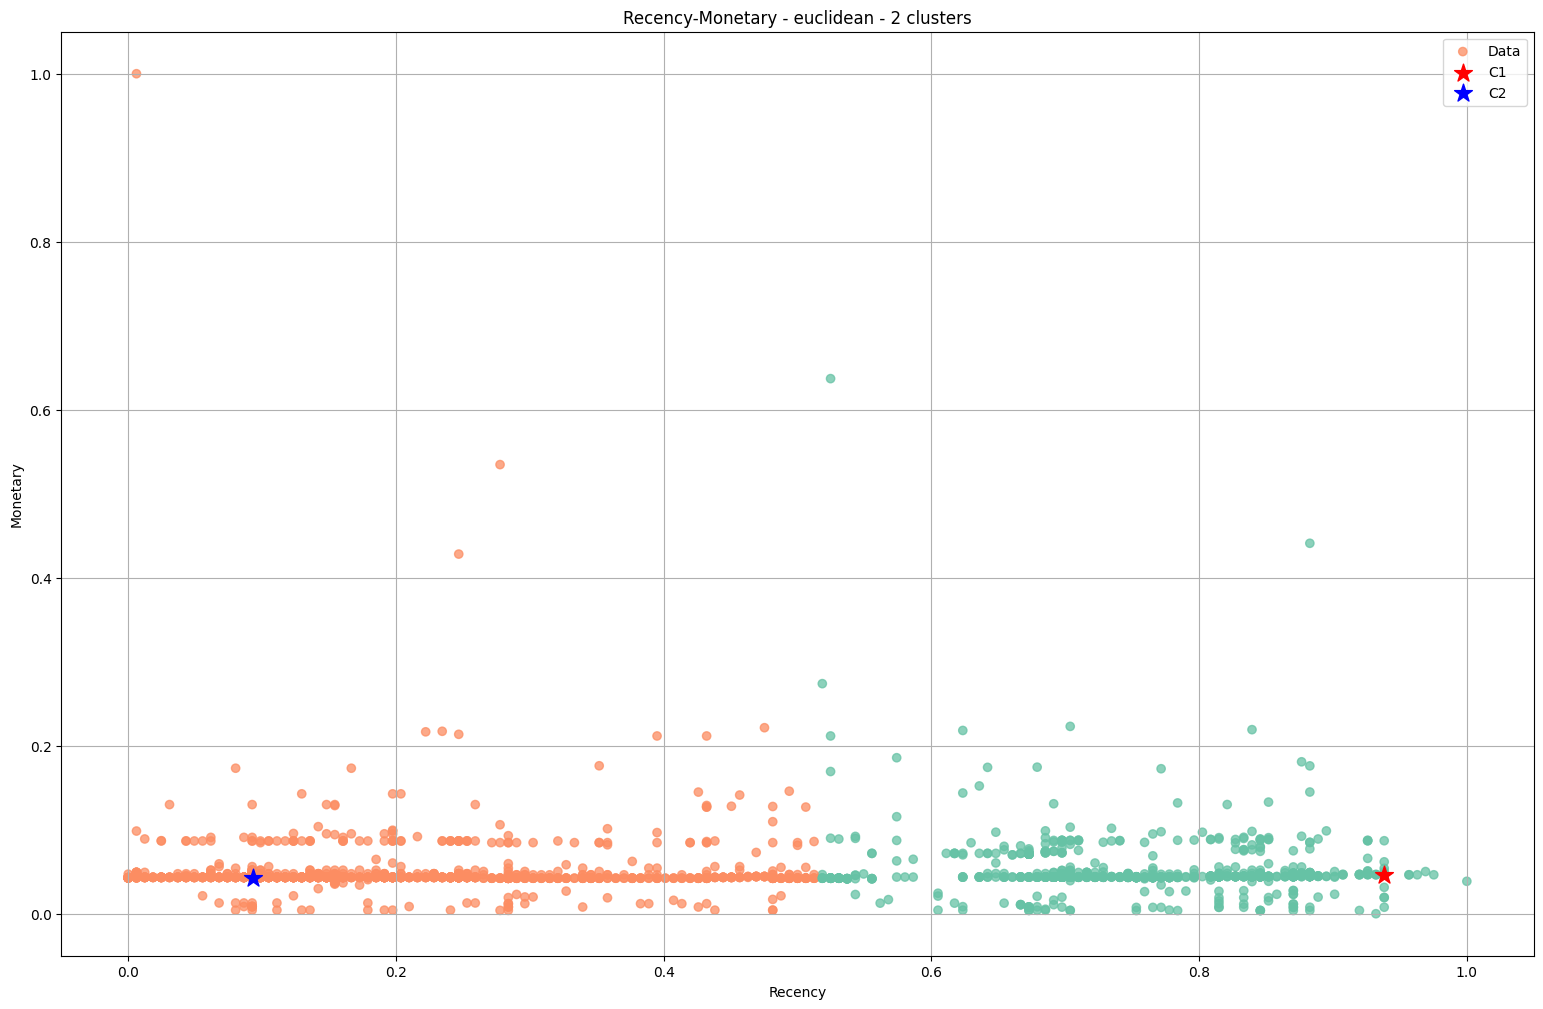

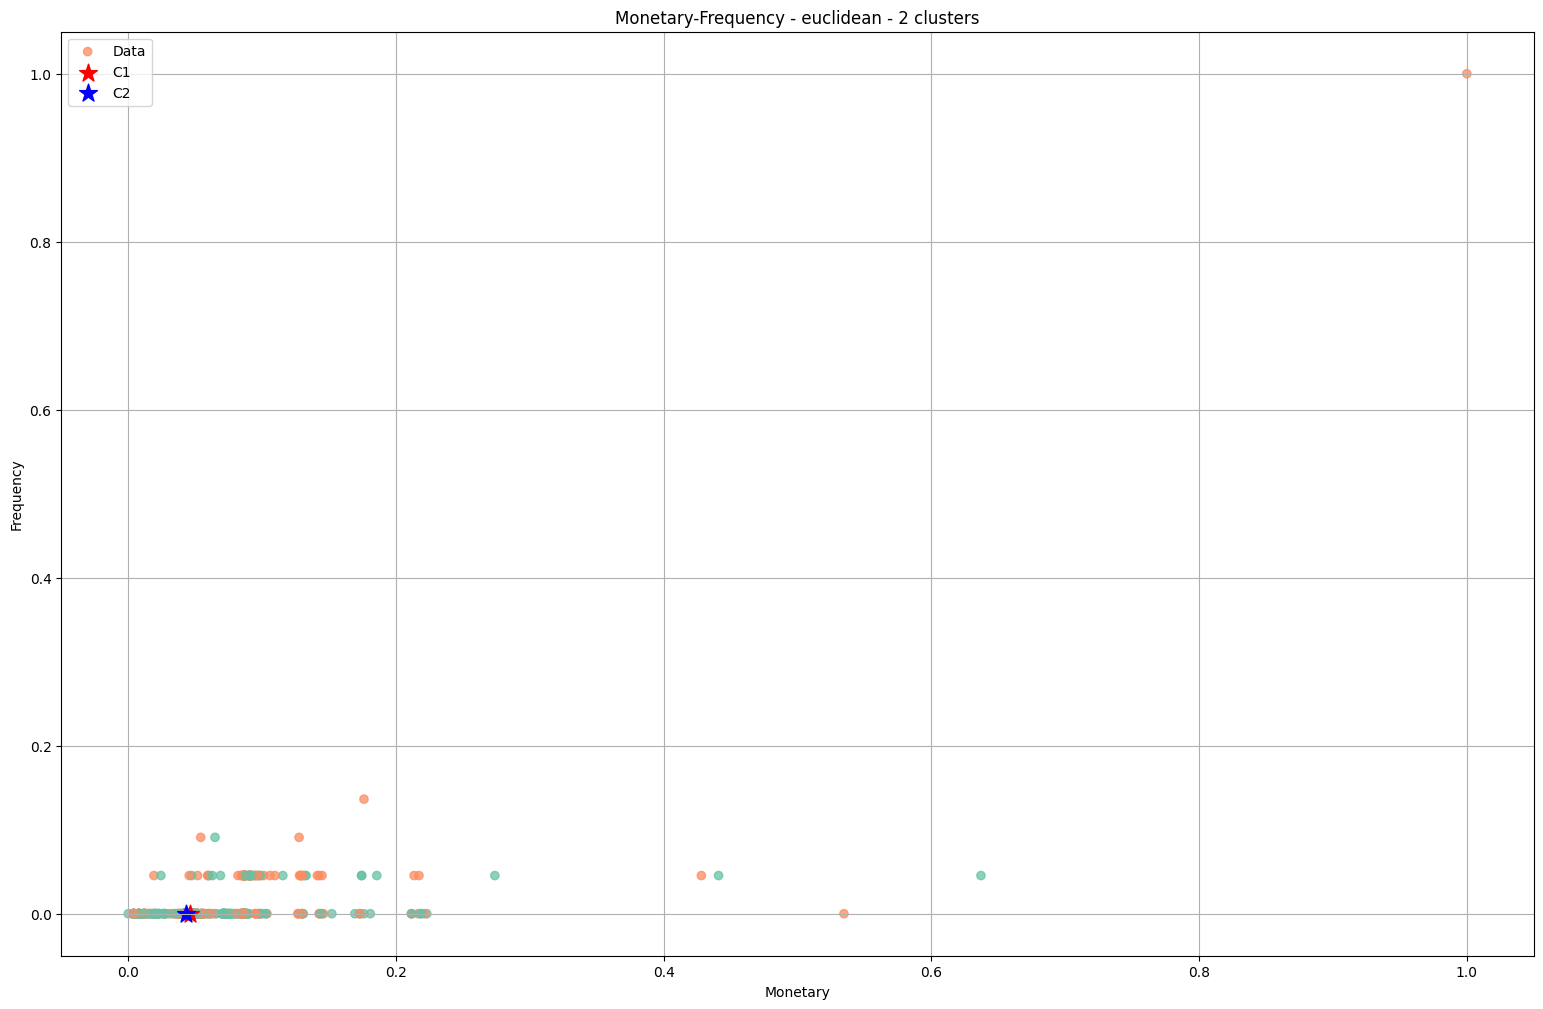

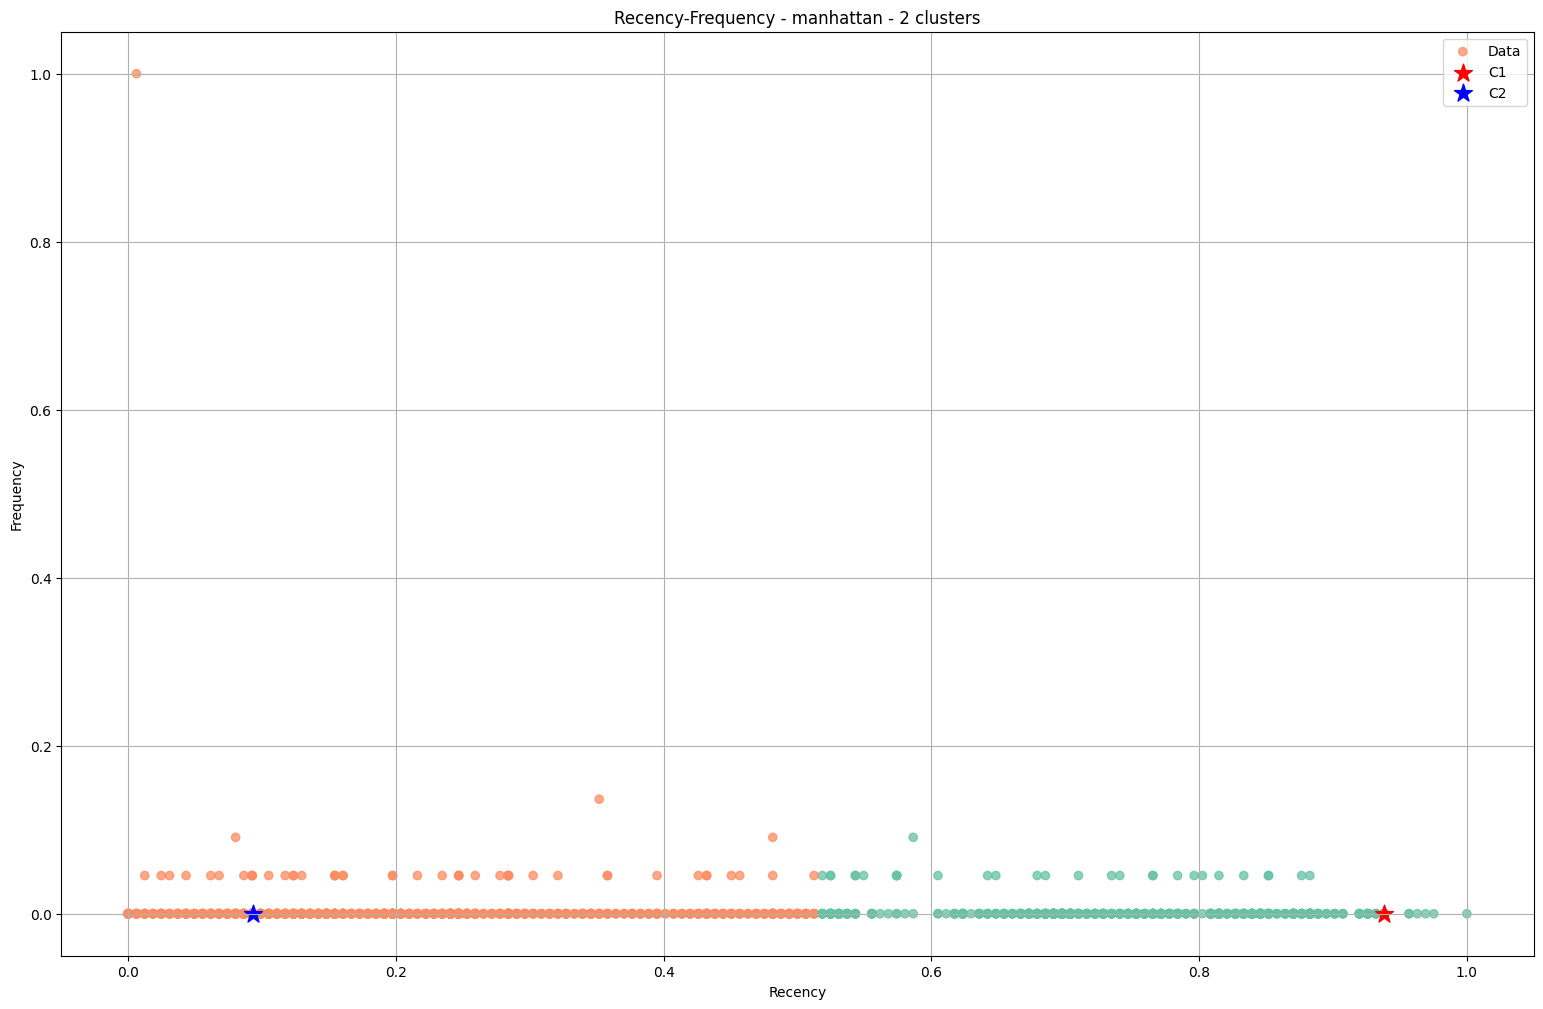

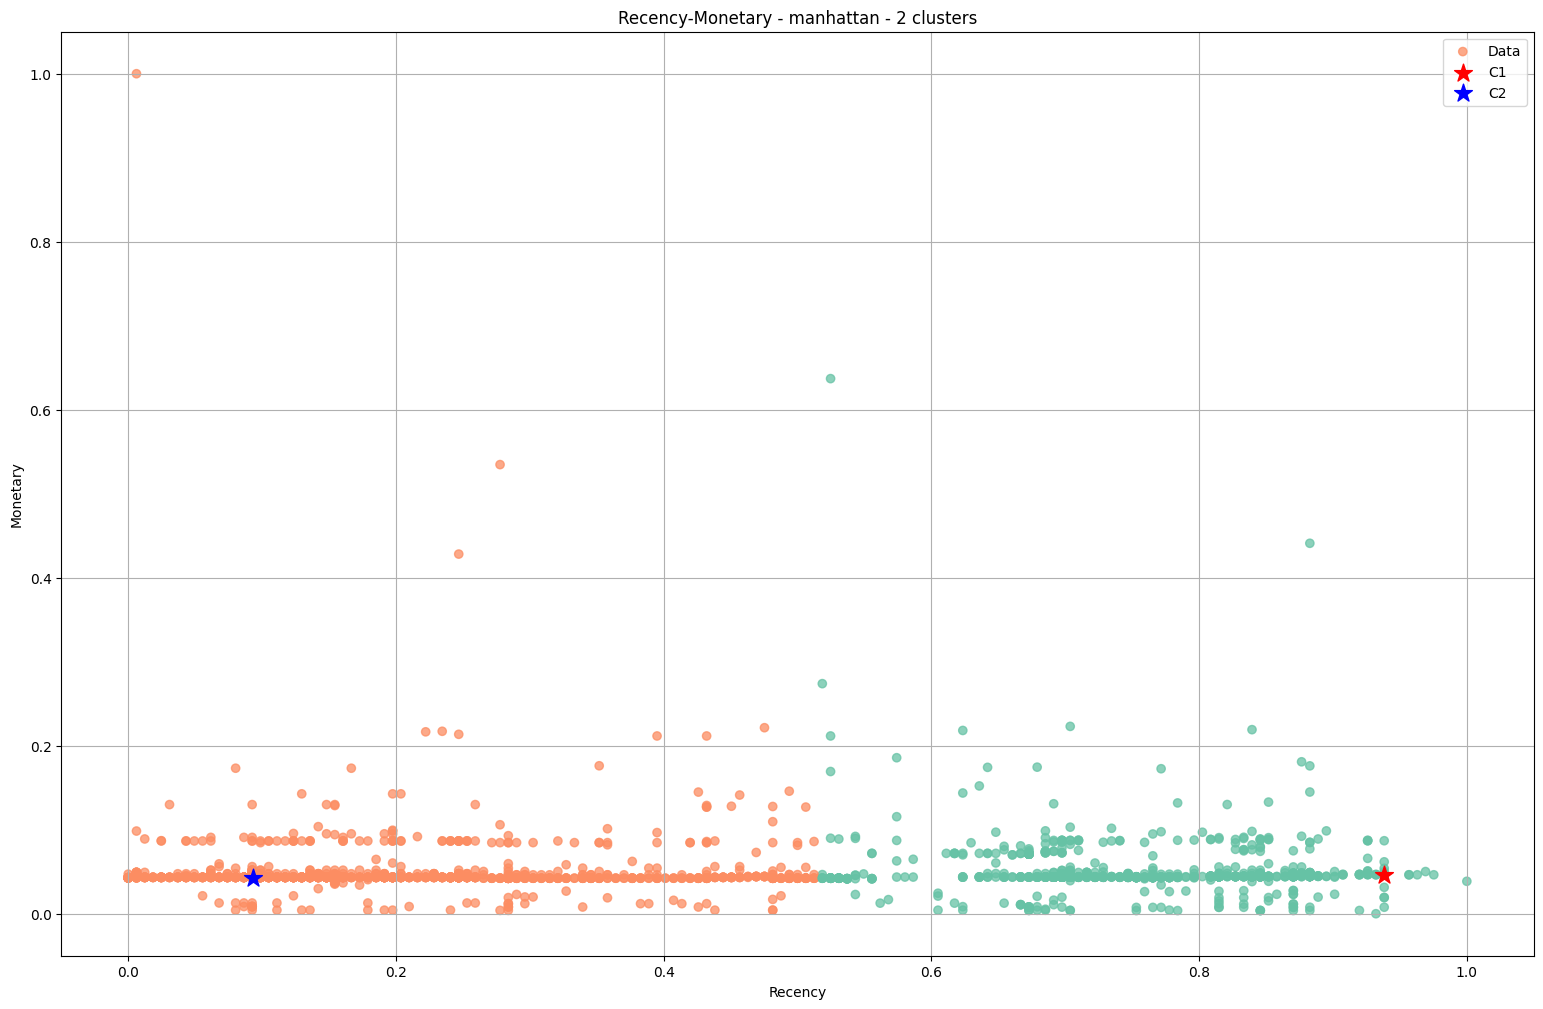

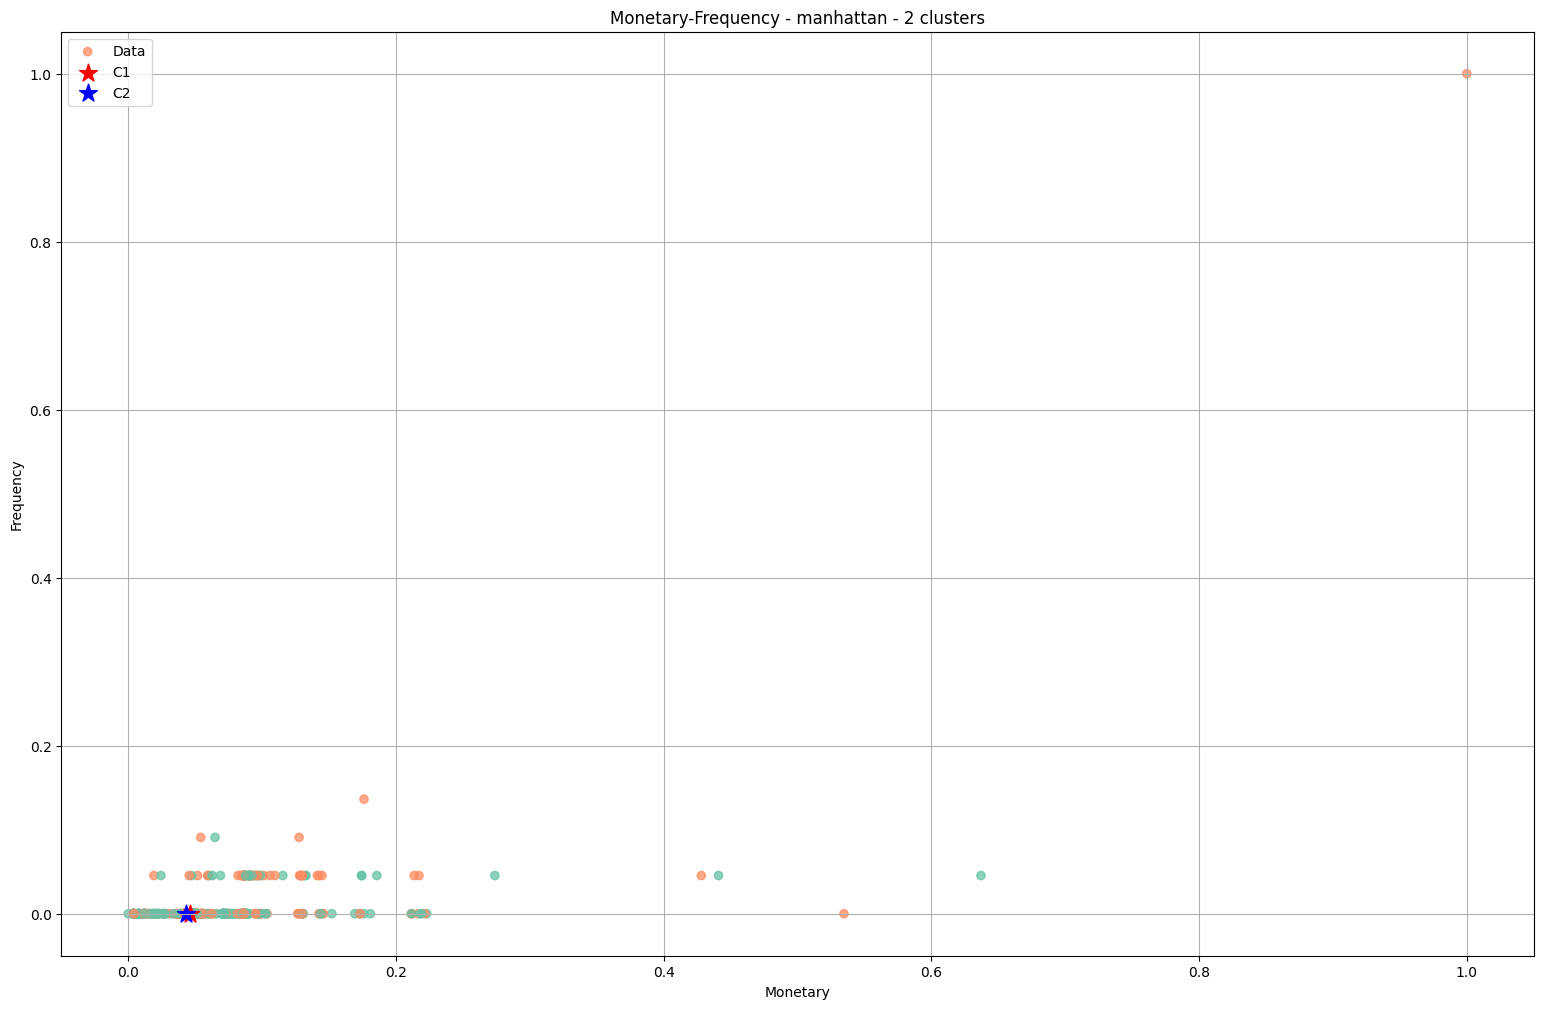

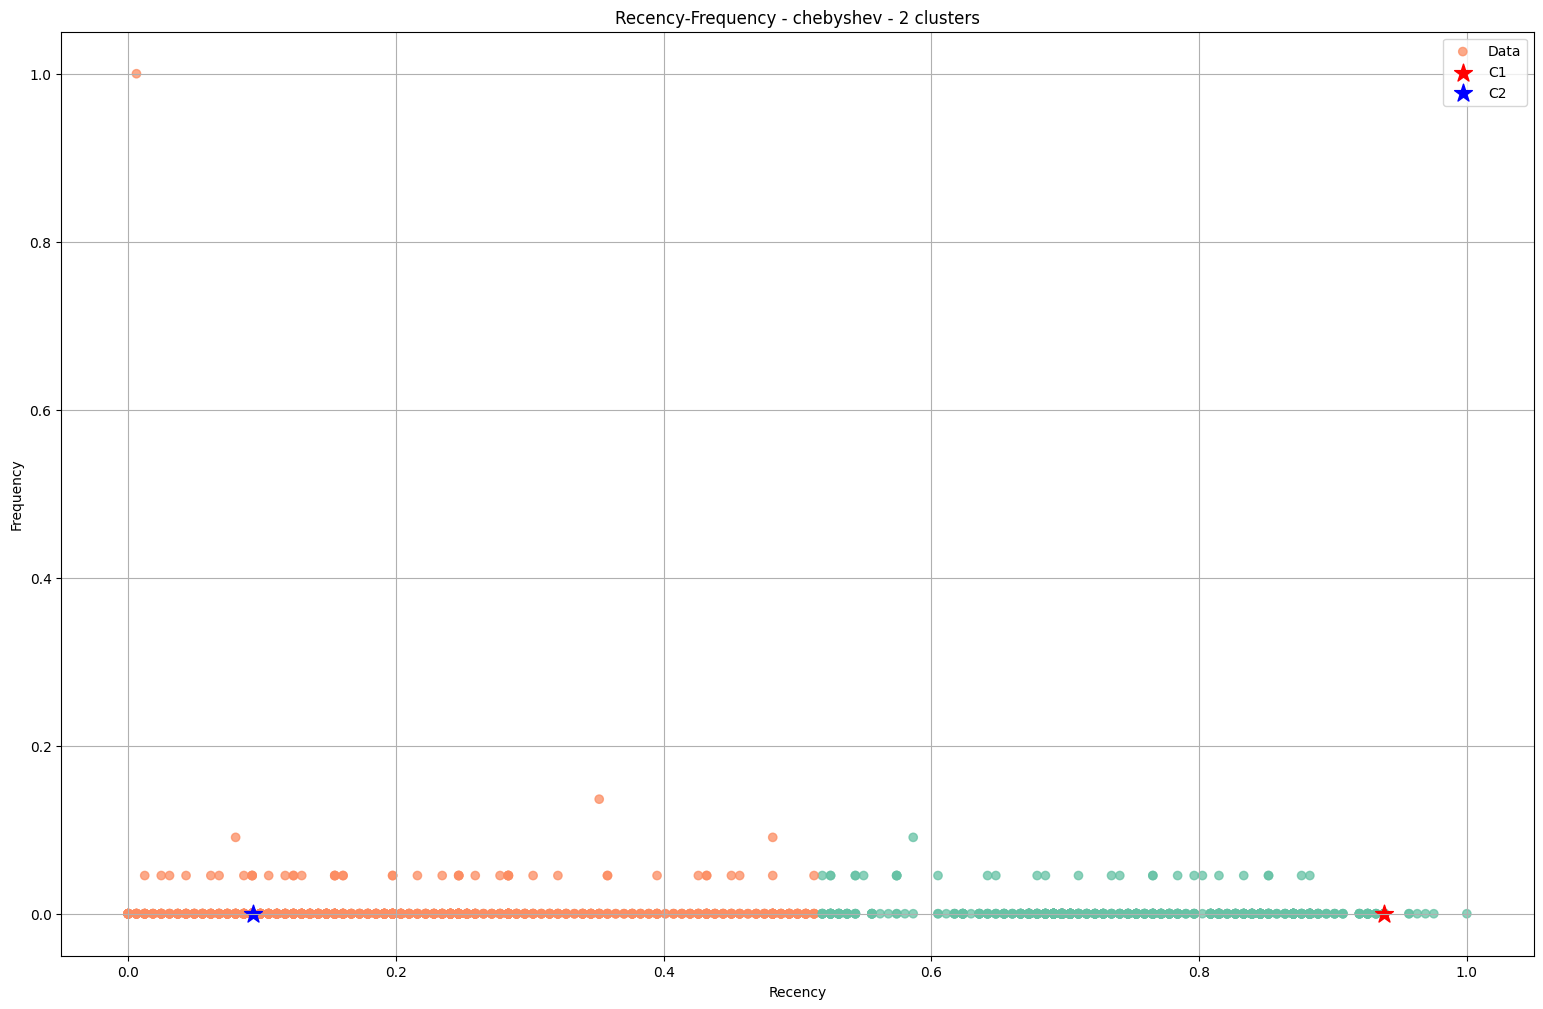

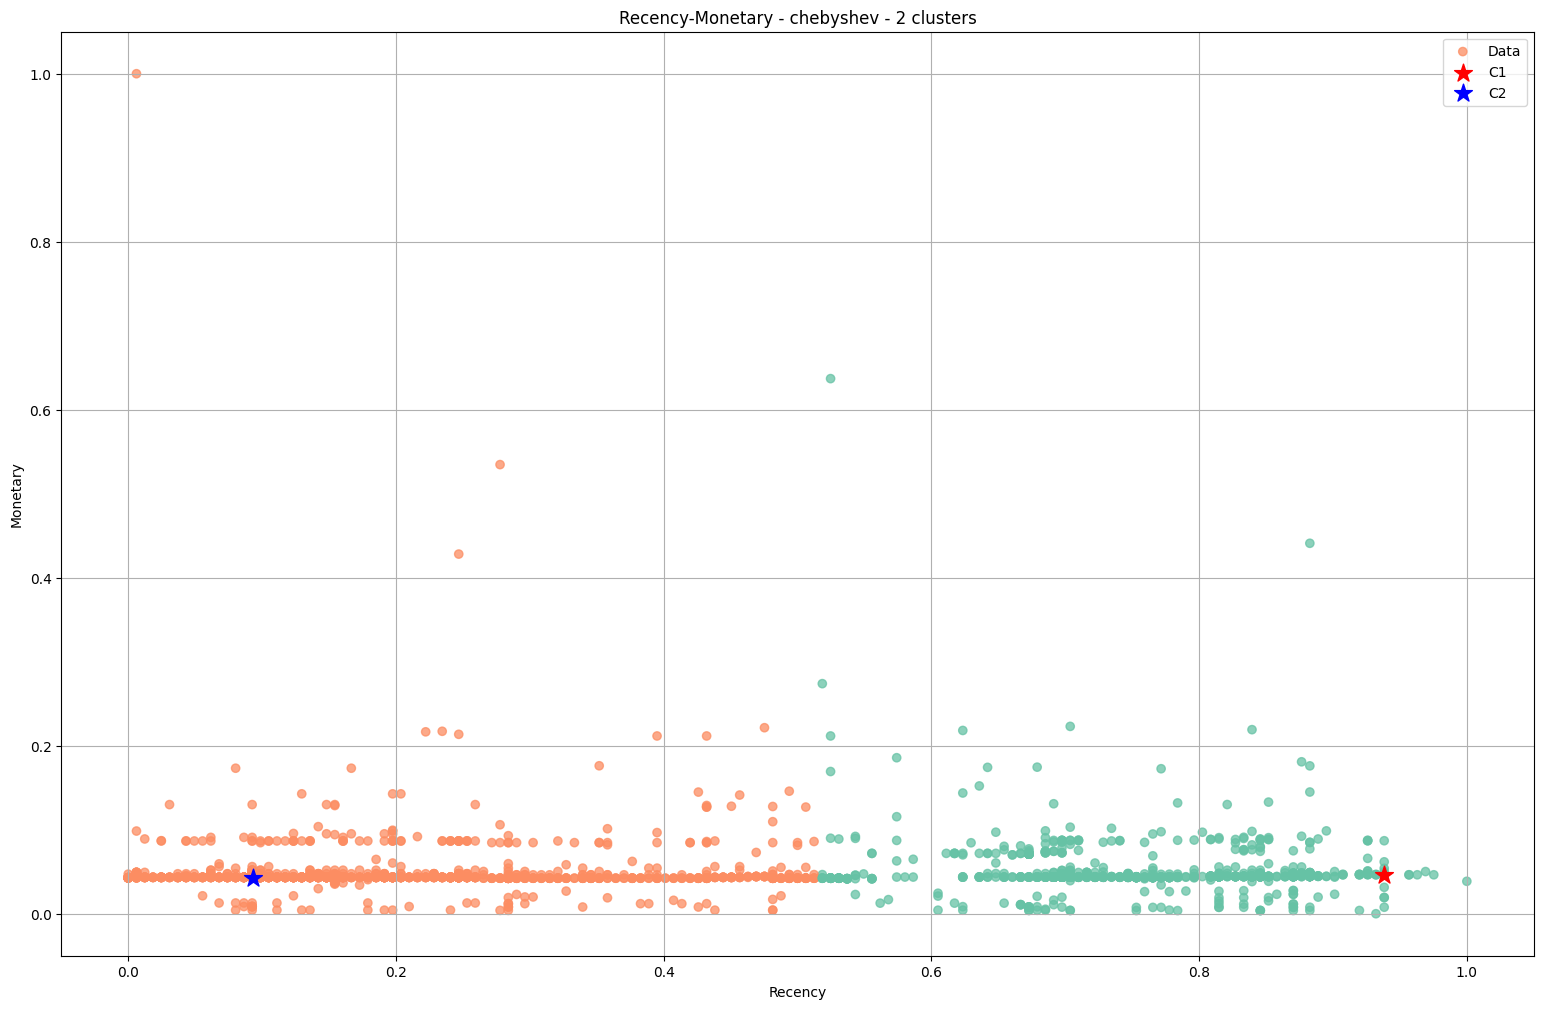

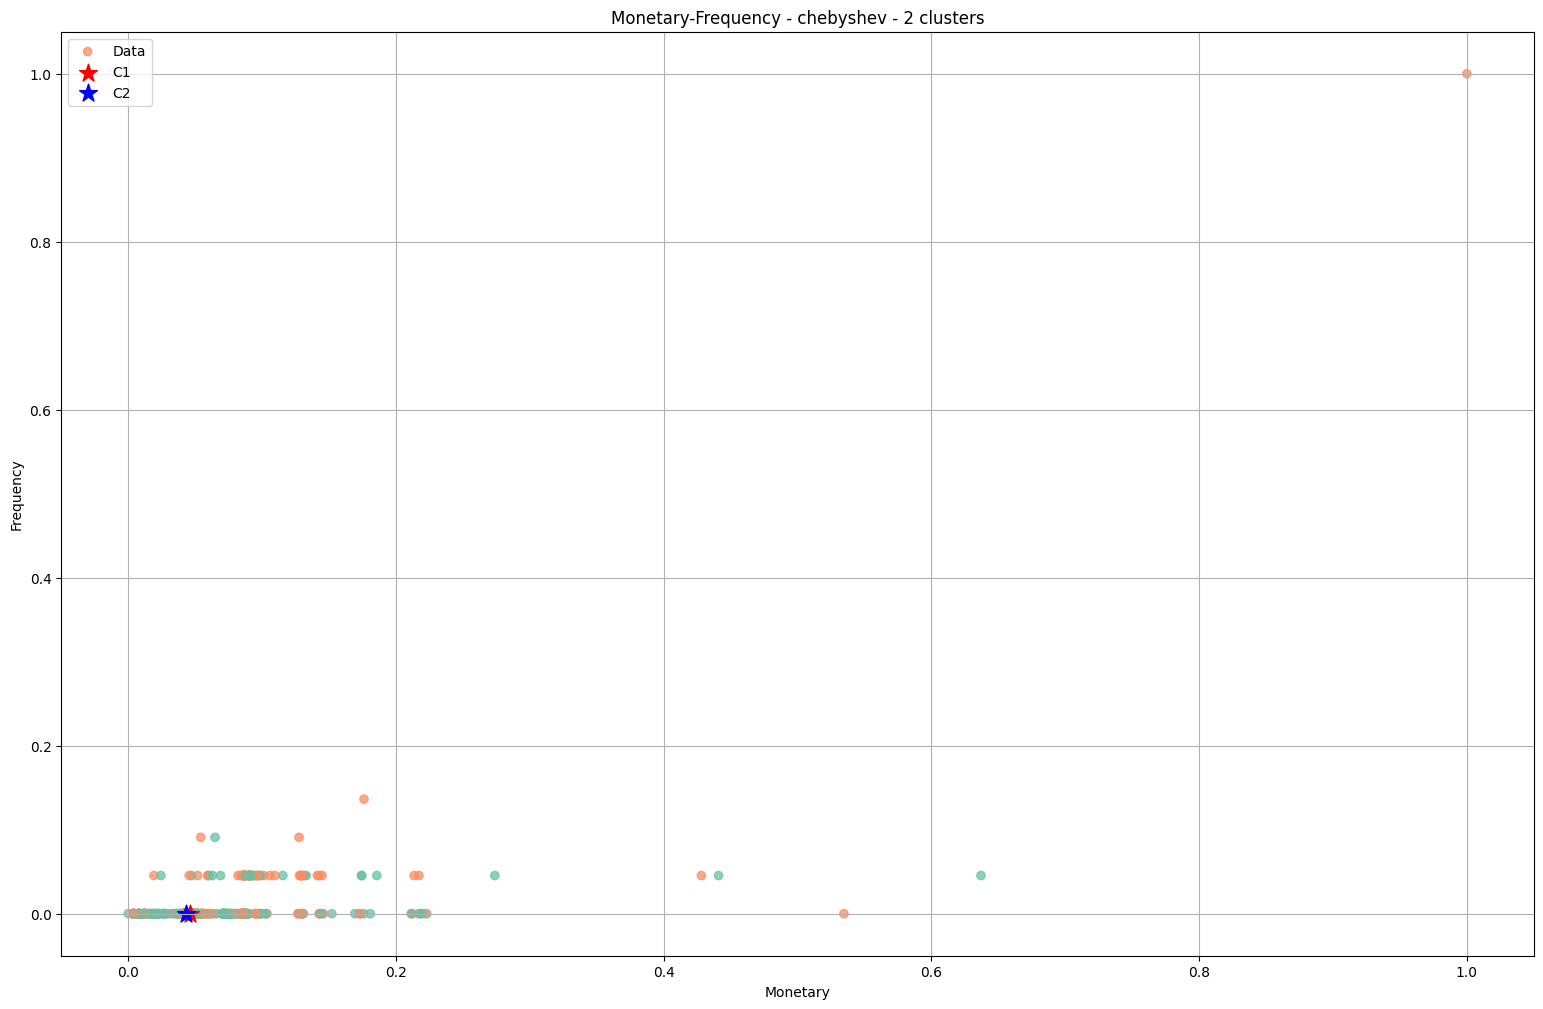

In [19]:
for nama_jarak in ["euclidean", "manhattan", "chebyshev"]:
    # Ubah variabel `colors` sesuai dengan jarak yang ingin ditampilkan
    colors = locals()[f"colors_{nama_jarak}"]

    for key in options.keys():
        title = "{}-{} - {} - {} clusters".format(
            options[key]["sumbu_x"], options[key]["sumbu_y"], nama_jarak, jumlah_cluster
        )
        
        # Atur ukuran grafik 1600x2400 pixel
        plt.figure(figsize=(19, 12))
        
        # Buat grafik titik data dengan warna berdasarkan cluster pada variabel `labels`
        plt.scatter(
            x = df_rfm[options[key]['sumbu_x']], 
            y = df_rfm[options[key]['sumbu_y']], 
            c = colors, alpha = 0.75, label = 'Data')

        # Buat titik setiap medoid
        for i, medoid in enumerate(medoids_cluster):
            plt.scatter(
                x = medoid[options[key]['index_x']], 
                y = medoid[options[key]['index_y']], 
                marker = '*', s = 180, alpha = 1.00, 
                c = medoid_colors1[i], label = f'C{i+1}')

        # Tambahkan informasi grafik
        plt.xlabel(options[key]["sumbu_x"])
        plt.ylabel(options[key]["sumbu_y"])
        plt.title(title)
        plt.legend()
        plt.grid()

        # Simpan grafik menjadi file .png
        plt.savefig(f"grafik hasil/{jumlah_cluster} clusters/{title}.png", bbox_inches='tight')

        # Tampilkan grafik
        plt.show()

# Evaluasi Hasil Clustering menggunakan Metrik DBI

In [20]:
from sklearn.metrics import davies_bouldin_score

# Calculate DBI for Euclidean clusters
dbi_euclidean = davies_bouldin_score(df_rfm, labels_euclidean)
print(f"Davies-Bouldin Index for Euclidean clusters: {dbi_euclidean}")

# Calculate DBI for Manhattan clusters
dbi_manhattan = davies_bouldin_score(df_rfm, labels_manhattan)
print(f"Davies-Bouldin Index for Manhattan clusters: {dbi_manhattan}")

# Calculate DBI for Chebyshev clusters
dbi_chebyshev = davies_bouldin_score(df_rfm, labels_chebyshev)
print(f"Davies-Bouldin Index for Chebyshev clusters: {dbi_chebyshev}")

Davies-Bouldin Index for Euclidean clusters: 0.3707402225885233
Davies-Bouldin Index for Manhattan clusters: 0.3707402225885233
Davies-Bouldin Index for Chebyshev clusters: 0.3707402225885233
